# Загрузка данных 

ВНИМАНИЕ! Рекомендуется запускать этот ноутбук в Google Colab, на GPU. Сменить среду выполнения можно так: <br>
<code>Среда выполнения -> Сменить среду выполнения -> GPU</code>. <br>
В противном случае запуск и выполнение кода займет более продолжительное время. 

Установим необходимые библиотеки через pip.

In [299]:
!pip install requirements.txt

# Сбор данных

### Задание

Соберите отзывы (3-5 разных классов) о Россельхозбанке с сайта Банки.ру. Например, класс “Обслуживание” или “Кредит”.

Можно воспользоваться [ссылкой на сайт](https://www.banki.ru/services/responses/bank/rshb/).

Способ получения данных выберите самостоятельно — можете собирать вручную или написать код для парсинга данных.

Убедитесь, что вы имеете достаточно данных по каждому классу.
Чем больше отзывов вы соберете — тем лучше.

### Реализация

Для сбора данных будет реализован парсер для сайта banki.ru, собирающий все комментарии по некоторой услуге. Данные по комментариям будут собраны и соединены в единый DataFrame, затем сохранены в csv-формат. Каждому коммантарию будет присвоен свой класс.

Выберу классы: <br>
1. Дебетовая карта
2. Ипотека
3. Потребительский кредит
4. Вклад

Будут собраны следующие данные для каждого класса:
1. Заголовок
2. Текст отзыва
3. URL отзыва
4. Оценка
5. Дата
6. Класс {'debitcard', 'credit', 'deposit', 'hypothec'}

Для парсинга сайта будет использоваться библиотека Beautiful Soup, для запросов - requests.

In [454]:
# импортируем необходимые библиотеки
import requests 
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

In [302]:
# Ссылки: 
# Потребительский кредит:
link_credits = 'https://www.banki.ru/services/responses/bank/rshb/product/credits/?page='
# Ипотека: 
link_hypothec = 'https://www.banki.ru/services/responses/bank/rshb/product/hypothec/?page='
# Дебетовая карта: 
link_debitcards = 'https://www.banki.ru/services/responses/bank/rshb/product/debitcards/?page='
# Вклад: 
link_deposits = 'https://www.banki.ru/services/responses/bank/rshb/product/deposits/?page='

In [303]:
# получить список словарей данных для страницы (уже прочитанной bs) и присвоить им класс label 
def get_info_for_bs_page(bs, label):
    responses = bs.find_all(class_='responses__item')
    result = [{
            'title': i.find('a').text,
            'url': 'banki.ru' + i.find('a')['href'],
            'text': i.find(class_='responses__item__message markup-inside-small markup-inside-small--bullet').text.strip(), 
            'score': int(i.find(class_='rating-grade').text.strip()) if i.find(class_='rating-grade') else None,
            'date': i.find('time', class_='display-inline-block').text,
            'label': label
    } for i in responses]
        
    return result

In [460]:
# получить все страницы по выбранной ссылке (link_reviews) с выбранным классом (label)
def get_all_reviews(link_reviews, label):
    # изменим заголовки, чтобы сайт не блокировал запросы
    session = requests.session() 
    session.headers['Accept'] = \
    'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'
    session.headers['User-Agent'] = \
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'
    # чтобы сайт не посчитал нас Ddos
    session.keep_alive = False

    all_reviews = []
    i = 1
    print(f'Загружаю данные для {label}')
    print('Загружено страниц: ', end=' ')
    while 1:
        try:
            req = session.get(link_reviews + str(i))
        except:
            req = session.get(link_reviews + str(i))
        else: 
            if req.status_code == 404:
                break
            bs = BeautifulSoup(req.text)
            all_reviews.extend(get_info_for_bs_page(bs, label))
            print(i, end = ' ')
            i += 1
    return all_reviews

### Кредит

Загрузим все данные по кредиту с помощью функции с необходимыми параметрами:

In [461]:
all_credit = get_all_reviews(link_credits, 'credit')

Загружаю данные для credit
Загружено страниц:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

Сделаем из созданных данных датафрейм:

In [306]:
all_credit_df = pd.DataFrame(all_credit)

In [307]:
len(all_credit_df)

1317

Повторим эту операцию для остальных классов. 

### Ипотека

In [308]:
all_hypothec = get_all_reviews(link_hypothec, 'hypothec')

Загружаю данные для hypothec
Загружено:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 

In [309]:
all_hypothec_df = pd.DataFrame(all_hypothec)

In [310]:
len(all_hypothec_df)

2933

### Дебетовые карты

In [311]:
all_debitcards = get_all_reviews(link_debitcards, 'debitcard')

Загружаю данные для debitcard
Загружено:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 

In [312]:
all_debitcards_df = pd.DataFrame(all_debitcards)

In [313]:
len(all_debitcards_df)

2049

### Вклад

In [314]:
all_deposits = get_all_reviews(link_deposits, 'deposit')

Загружаю данные для deposit
Загружено:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 

In [315]:
all_deposits_df = pd.DataFrame(all_deposits)

In [316]:
len(all_deposits_df)

1837

### Создание единого DataFrame и сохранение в csv

Тепреь создадим единый DataFrame:

In [317]:
reviews_df = pd.concat([all_credit_df, all_hypothec_df, all_debitcards_df, all_deposits_df])

In [318]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 1836
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   8136 non-null   object 
 1   url     8136 non-null   object 
 2   text    8136 non-null   object 
 3   score   6382 non-null   float64
 4   date    8136 non-null   object 
 5   label   8136 non-null   object 
dtypes: float64(1), object(5)
memory usage: 444.9+ KB


Сохраним созданный df в формате csv (без индекса): 

In [319]:
reviews_df.to_csv('rshb_reviews.csv', index=False)

Таким образом, были получены все отзывы по четырем классам услуг с сайта banki.ru. При необходимости можно расширить выборку, добавив ссылку и label для нового класса. 

# Обучение моделей

1. Проведите небольшой описательный анализ данных

2. Решите задачу классификации подготовленных данных по определенным ранее вами классам

3. Выберите метрики, по которым будете интерпретировать результат.

4. Объясните ваш выбор метрик

5. Интерпретируйте и визуализируйте полученные результаты

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

In [321]:
# создадим dataframe из данных, полученных в задании 3, прочитав все файлы
filename = 'rshb_reviews.csv'
reviews_df = pd.read_csv(filename)

In [322]:
reviews_df.info() # получили 8000 комментариев для обучения модели

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   8136 non-null   object 
 1   url     8136 non-null   object 
 2   text    8136 non-null   object 
 3   score   6382 non-null   float64
 4   date    8136 non-null   object 
 5   label   8136 non-null   object 
dtypes: float64(1), object(5)
memory usage: 381.5+ KB


Данные носят преимущественно текстовый характер, описательную статистику можно привести по оценке. 

In [323]:
reviews_df.groupby('label')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
credit,938.0,3.234542,1.885291,1.0,1.0,5.0,5.0,5.0
debitcard,1696.0,2.249410,1.733157,1.0,1.0,1.0,5.0,5.0
deposit,1455.0,2.824742,1.844414,1.0,1.0,2.0,5.0,5.0
hypothec,2293.0,2.342782,1.756138,1.0,1.0,1.0,5.0,5.0


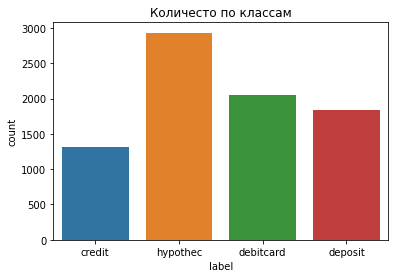

In [324]:
sns.countplot(data=reviews_df, x='label') # как видим, по ипотеке отзывов больше всего
plt.gca().set_title('Количесто по классам')
plt.show()

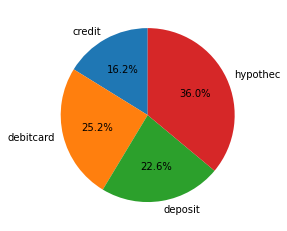

In [325]:
reviews_df.groupby('label').count()['title'].plot.pie(y='label', startangle=90, autopct="%.1f%%")
plt.gca().set_ylabel('')
plt.show()

Отзывов по ипотеке собрано больше всего, однако нет подавляющего преимущества какого-то из классов. Это значит, что мы можем использовать метрику accuracy (если считаем классы сбалансированными) для задачи классификации. 

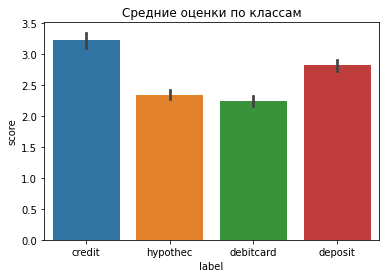

In [326]:
sns.barplot(x='label', y='score', data=reviews_df)
plt.gca().set_title('Средние оценки по классам')
plt.show()

Оценки по классам не слишком отличаются, и только по потребительским кредитам превышают 3 балла. Оценка слишком слабо различается от класса к классу, чтобы включать её в модель. 

##### Очистка данных

In [327]:
# функция очистки текста от лишних символов
def standartize_text(df, field):
    # переводим всё в нижний регистр, убираем цифры и знаки препринания, меняем ё на е
    df[field] = df[field].str.replace(r'[!\"#$%&\'()*+,-./:;<=>?@[\]\^_`{\|}~0-9]', ' ')
    df[field] = df[field].str.lower()
    df[field] = df[field].str.replace(r'ё', 'е')
    return df

In [328]:
reviews_clear_df = standartize_text(reviews_df, 'text')[['text', 'label']]

In [329]:
reviews_clear_df.head()

,text,label
0,закрыла потребительский кредит в банке ...,credit
1,по кредитному договору образовалась просрочка ...,credit
2,добрый день хочу написать благодарность...,credit
3,добрый день подавал заявки на кредит в банки ...,credit
4,требование решить вопрос о корректном закрытии...,credit


Присвоим классам числовые метки:

In [330]:
label_encoding = {'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}

In [331]:
reviews_clear_df['class_label'] = reviews_clear_df['label'].map(label_encoding)

In [332]:
reviews_clear_df.head()

,text,label,class_label
0,закрыла потребительский кредит в банке ...,credit,0
1,по кредитному договору образовалась просрочка ...,credit,0
2,добрый день хочу написать благодарность...,credit,0
3,добрый день подавал заявки на кредит в банки ...,credit,0
4,требование решить вопрос о корректном закрытии...,credit,0


### Добавление токенов

In [333]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

reviews_clear_df["tokens"] = reviews_clear_df["text"].apply(tokenizer.tokenize)
reviews_clear_df.head()

,text,label,class_label,tokens
0,закрыла потребительский кредит в банке ...,credit,0,"[закрыла, потребительский, кредит, в, банке, д..."
1,по кредитному договору образовалась просрочка ...,credit,0,"[по, кредитному, договору, образовалась, проср..."
2,добрый день хочу написать благодарность...,credit,0,"[добрый, день, хочу, написать, благодарность, ..."
3,добрый день подавал заявки на кредит в банки ...,credit,0,"[добрый, день, подавал, заявки, на, кредит, в,..."
4,требование решить вопрос о корректном закрытии...,credit,0,"[требование, решить, вопрос, о, корректном, за..."


### Продолжение анализа

In [334]:
def analyze_df_tokens(df, field):
    all_words = [word for tokens in df[field] for word in tokens]
    reviews_lengths = [len(tokens) for tokens in df[field]]
    vocab = sorted(list(set(all_words)))
    print(f'{len(all_words)} всего слов, со словарем размером {len(vocab)}')
    print(f'Максимальная длина отзыва: {max(reviews_lengths)}')
    return all_words, reviews_lengths, vocab
    
all_words, reviews_lengths, _ = analyze_df_tokens(reviews_clear_df, 'tokens')

1312037 всего слов, со словарем размером 52554
Максимальная длина отзыва: 2427


In [335]:
def plot_reviews_lenghts(reviews_lengths, kde=False):
    sns.distplot(reviews_lengths, kde=kde)
    ax = plt.gca()
    ax.set_title('Число отзывов разной длины')
    ax.set_ylabel('Число отзывов')
    ax.set_xlabel('Длина отзыва')

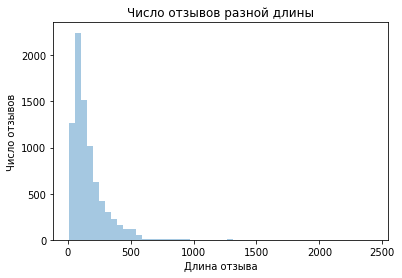

In [336]:
plot_reviews_lenghts(reviews_lengths)

Посмотрим детальнее:

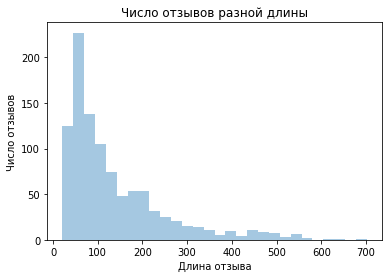

In [337]:
plot_reviews_lenghts(reviews_lengths[:1000])

Как видно на графике, чаще всего отзывы меньше 300 слов. 

In [338]:
from collections import Counter
all_words_freq = Counter(all_words)

In [339]:
# самые распространенные слова можно убрать - они вносят шум в модель
all_words_freq.most_common()[:50]

[('в', 53739),
 ('и', 40253),
 ('не', 29169),
 ('на', 27176),
 ('что', 21520),
 ('я', 17105),
 ('с', 16755),
 ('по', 14904),
 ('банка', 11187),
 ('мне', 9696),
 ('банк', 8571),
 ('за', 8407),
 ('а', 8291),
 ('к', 7595),
 ('все', 7538),
 ('как', 7192),
 ('но', 6758),
 ('это', 6183),
 ('у', 6144),
 ('меня', 5920),
 ('так', 5406),
 ('то', 5403),
 ('о', 5390),
 ('для', 5209),
 ('от', 4237),
 ('было', 4103),
 ('г', 3989),
 ('же', 3933),
 ('при', 3804),
 ('уже', 3704),
 ('до', 3702),
 ('из', 3523),
 ('нет', 3380),
 ('еще', 3341),
 ('только', 3302),
 ('день', 3297),
 ('мы', 3275),
 ('очень', 3264),
 ('деньги', 3225),
 ('банке', 3136),
 ('через', 3052),
 ('отделение', 2978),
 ('карту', 2928),
 ('карты', 2803),
 ('офис', 2713),
 ('документы', 2637),
 ('время', 2636),
 ('т', 2603),
 ('кредит', 2573),
 ('после', 2522)]

### Очистка текта от стоп-слов

In [340]:
# следует избавиться от слов, которые встречаются чаще других и лемматизировать слова
# для этого можно воспользоваться дополнительными библиотеками
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords # набор стоп-слов

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [341]:
# список стоп-слов
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('г') # убрать обозначение года

In [342]:
# для удаления стоп-слов из списка токенов
def remove_stop_words_from_list(lst, stpw=russian_stopwords): 
    return [w for w in lst if w not in stpw]

In [343]:
reviews_clear_df['tokens_nstop'] = reviews_clear_df['tokens'].apply(remove_stop_words_from_list)

In [344]:
all_words, reviews_lengths, _ = analyze_df_tokens(reviews_clear_df, 'tokens') # старые слова

1312037 всего слов, со словарем размером 52554
Максимальная длина отзыва: 2427


In [345]:
all_words, reviews_lengths, _ = analyze_df_tokens(reviews_clear_df, 'tokens_nstop') # радикально сократилось число слов

841980 всего слов, со словарем размером 52402
Максимальная длина отзыва: 1527


In [346]:
my_tags = reviews_clear_df['class_label'].unique() # значения классов 

### Лемматизация и определение части речи

Библиотека pymorphy позволяет относительно быстро лемматизировать тексты. Воспользуемся ей. 

In [347]:
from pymorphy2 import MorphAnalyzer

In [348]:
m1 = MorphAnalyzer(lang='ru')

In [349]:
def lemmatize_and_tag_tokens(word_list, morph=m1):
    parse_list = map(morph.parse, word_list)
    return [w[0].normal_form + '_' + w[0].tag.POS for w in parse_list if w[0].tag.POS] 

Поместим лемматизированные и получившие название части речи отзывы в отдельный столбец датафрейма с очищенными отзывами.

In [350]:
%%time 
# выполняется ~2 минуты на GPU
reviews_clear_df['tokens_nstop_lemm_pos'] = reviews_clear_df['tokens_nstop'].map(lambda x: lemmatize_and_tag_tokens(x))

CPU times: user 2min 8s, sys: 0 ns, total: 2min 8s
Wall time: 2min 8s


In [351]:
print(reviews_clear_df['tokens_nstop_lemm_pos'][0])

['закрыть_VERB', 'потребительский_ADJF', 'кредит_NOUN', 'банк_NOUN', 'досрочно_ADVB', 'погасить_VERB', 'обозначить_PRTF', 'сотрудник_NOUN', 'сумма_NOUN', 'сразу_ADVB', 'сказать_VERB', 'необходимый_ADJS', 'документ_NOUN', 'банк_NOUN', 'оповещать_PRTF', 'мой_ADJF', 'обязательство_NOUN', 'исполнить_PRTS', 'должный_ADJS', 'этот_ADJF', 'бумага_NOUN', 'нужный_ADJS', 'первый_ADJF', 'очередь_NOUN', 'банк_NOUN', 'постоянно_ADVB', 'иметься_VERB', 'к_PREP', 'требование_NOUN', 'р_NOUN', 'р_NOUN', 'оказываться_VERB', 'должный_ADJS', 'месяц_NOUN', 'начинаться_VERB', 'звонок_NOUN', 'требование_NOUN', 'смс_NOUN', 'кредитный_ADJF', 'история_NOUN', 'благодаря_PREP', 'контора_NOUN', 'испортить_PRTS', 'спросить_VERB', 'нужно_PRED', 'написать_INFN', 'заявление_NOUN', 'кто_NPRO', 'ответить_VERB', 'мой_ADJF', 'заявление_NOUN', 'закрытие_NOUN', 'счёт_NOUN', 'это_PRCL', 'указать_PRTS', 'повторно_ADVB', 'нужно_PRED', 'адрес_NOUN', 'электронный_ADJF', 'почта_NOUN', 'указать_PRTS', 'течение_NOUN', 'рабочий_ADJF',

### Применение машиинного обучения

Создаём векторное представление

In [352]:
reviews_clear_df.head()

,text,label,class_label,tokens,tokens_nstop,tokens_nstop_lemm_pos
0,закрыла потребительский кредит в банке ...,credit,0,"[закрыла, потребительский, кредит, в, банке, д...","[закрыла, потребительский, кредит, банке, доср...","[закрыть_VERB, потребительский_ADJF, кредит_NO..."
1,по кредитному договору образовалась просрочка ...,credit,0,"[по, кредитному, договору, образовалась, проср...","[кредитному, договору, образовалась, просрочка...","[кредитный_ADJF, договор_NOUN, образоваться_VE..."
2,добрый день хочу написать благодарность...,credit,0,"[добрый, день, хочу, написать, благодарность, ...","[добрый, день, хочу, написать, благодарность, ...","[добрый_ADJF, день_NOUN, хотеть_VERB, написать..."
3,добрый день подавал заявки на кредит в банки ...,credit,0,"[добрый, день, подавал, заявки, на, кредит, в,...","[добрый, день, подавал, заявки, кредит, банки,...","[добрый_ADJF, день_NOUN, подавать_VERB, заявка..."
4,требование решить вопрос о корректном закрытии...,credit,0,"[требование, решить, вопрос, о, корректном, за...","[требование, решить, вопрос, корректном, закры...","[требование_NOUN, решить_INFN, вопрос_NOUN, ко..."


#### Мешок слов

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer # получаем векторные представления и count_vectorizer

list_corpus = reviews_clear_df["text"].tolist()
list_labels = reviews_clear_df["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

Визуализируем векторные представления коммантариев, снизив размерность с помощью латентно-семантического анализа:

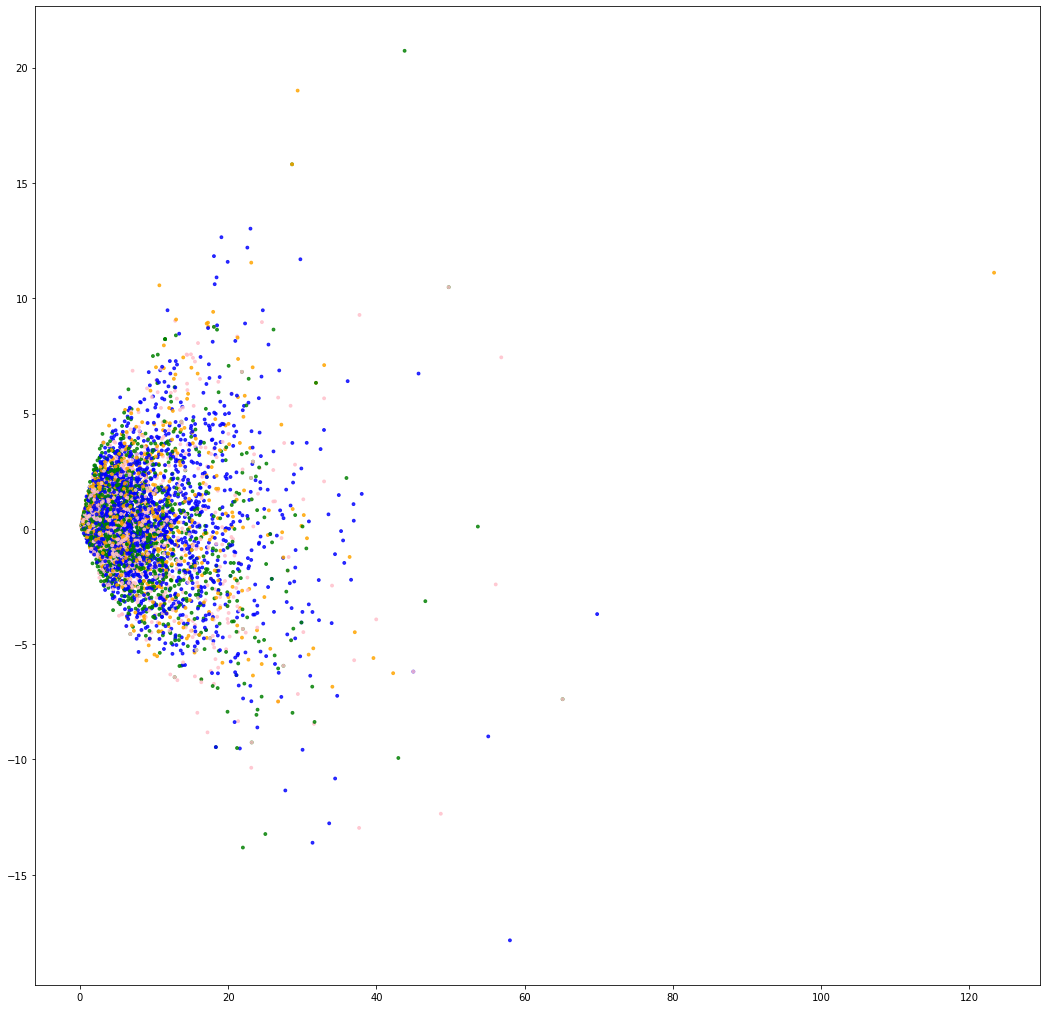

In [448]:
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['orange','blue', 'green', 'pink']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels,
                    cmap=matplotlib.colors.ListedColormap(colors))

fig = plt.figure(figsize=(18, 18))          
try:    
    plot_LSA(X_train_counts, y_train)
except:
    plot_LSA(X_train_counts, y_train)
plt.show()

На графике видно, что классы почти не отделены друг от друга. 

Строим модель классификатора

In [355]:
from sklearn.linear_model import LogisticRegression

def train_logreg_model(X_train, y_train):
    logreg = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                             multi_class='multinomial', n_jobs=-1, random_state=40)
    print('cls done')
    logreg.fit(X_train, y_train) # может занять около 2-х минут
    print('fit done')
    return logreg

logreg = train_logreg_model(X_train_counts, y_train)
y_predicted_counts = logreg.predict(X_test_counts)

cls done
fit done


Оцениваем классификатор. Поскольку мы используем множественный классификатор, то воспользуемся метриками f1 (который представляет собой гармоническое среднее между precision и recall и показывает ), accuracy (можем использовать потому классы разбалансированы, но не сильно - она будет главной метрикой), а также матрица ошибок - по ней можно получить легко интерпретируемую информацию о нашей модели, какие классы она угадывает хорошо, какие плохо, а какие путает между собой.

Мы не можем использовать ROC-AUC, потому что эта метрика применима только для бинарной классификации.

Таким образом, ключевой метрикой является accuracy, вторичной - f1, а на матрицу ошибок будем смотреть, чтобы понять, насколько хорошо модель угадывает тот или иной класс. 

In [356]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools


def eval_prediction(y_test, y_predicted, normalize=False):  
    # tp / (tp + fp) - сколько выбранных значений релевантно
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # tp / (tp + fn) - сколько релевантых значений выбрано
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    # гармоническое среднее precision и recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    # tp + tn/ tp + tn + fp + fn
    accuracy = accuracy_score(y_test, y_predicted)
    
    cm = confusion_matrix(y_test, y_predicted, labels=my_tags)
    plot_confusion_matrix(cm, normalize, 'Матрица ошибок')
    
    return accuracy, precision, recall, f1


def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="black" if cm[i, j] < thresh else "white", fontsize=18)

    
    plt.tight_layout()
    plt.ylabel('Истинный')
    plt.xlabel('Предсказанный')

accuracy = 0.748, precision = 0.750, recall = 0.748, f1 = 0.748
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


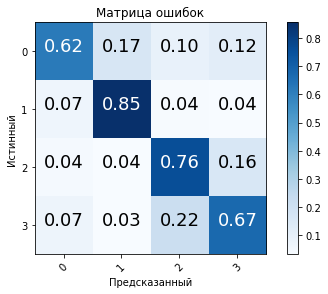

In [357]:
accuracy, precision, recall, f1 = eval_prediction(y_test, y_predicted_counts, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Метрики довольно сбалансированны, и показаывают примерно одинаковый результат - 74.5% - 75%. Это говорит о том, что модель одинаково хорошо предсказывает большую часть входных данных.

По поводу матрицы ошибок: можно сказать, что ипотеку логистическая регрессия п на мешке слов предсказывает лучше всего - 86% наблюдений. Дебетовые карты и депозиты чаще всего путаются между собой, а хуже всего предсказывается отзыв о кредите - только 66% предсказаний оказываются правильными.

Теперь посмотрим на то, какие слова наиболее важны для нашей модели логистической регрессии при помощи облака слов:

In [358]:
from wordcloud import WordCloud

In [359]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # цикл для каждого класса 
    classes ={}
    for class_index in range(model.coef_.shape[0]): 
        word_importances = [(el, index_to_word[i]) for i, el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        classes[class_index] = tops
    return classes


def plot_most_important_features(importance, nfeat=4, rows=2, columns=2): # importance - словарь {слово:вес}
    fig = plt.figure(figsize=(10, 8))
    l_dict = {v: k for k, v in label_encoding.items()}
    for i in range(nfeat):
        weight_word_dict = {v:k for k, v in importance[i]}
        fig.add_subplot(rows, columns, i+1)
        wc = WordCloud(background_color='white')
        plt.imshow(wc.fit_words(weight_word_dict), interpolation='bilinear')
        plt.title(f'Класс {l_dict[i]}')
        plt.axis('off')
    plt.tight_layout()

In [360]:
# возьмем 20 самых популярных слов для модели логистической регрессии с мешком слов 
importance = get_most_important_features(count_vectorizer, logreg, 20) 

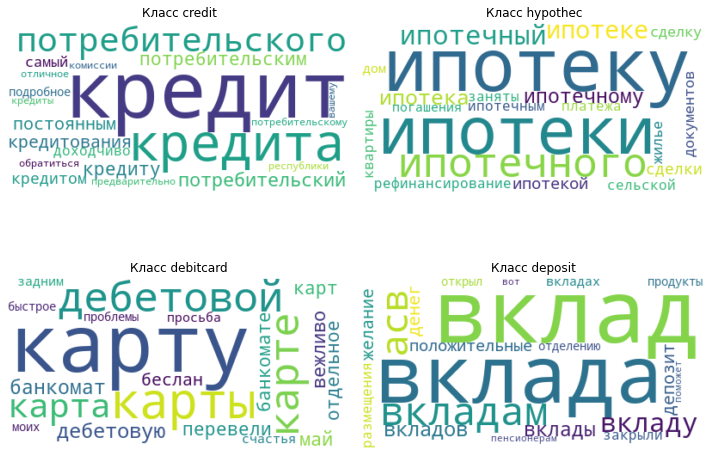

In [361]:
plot_most_important_features(importance) # так и хочется применить лемматизацию 

Как видно по облакам слов, в каждом классе комментариев превалируют названия классов (только на русском). Можно заметить, что слова представлены в разных падежах - это надо исправить лемматизацией.

Применим стемматизацию и посмотрим на результаты. 

In [362]:
# для этого воспользуемся стеммингом snowball
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')

In [363]:
stemmed_corpus = reviews_clear_df['tokens'].map(lambda x: [stemmer.stem(i) for i in x]) # 2-3 минуты

In [364]:
stemmed_corpus = stemmed_corpus.map(lambda x: ' '.join(x)).tolist()
list_labels = reviews_clear_df["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(stemmed_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts_stemmed, count_vectorizer_stemmed = cv(X_train)
X_test_counts_stemmed = count_vectorizer.transform(X_test)

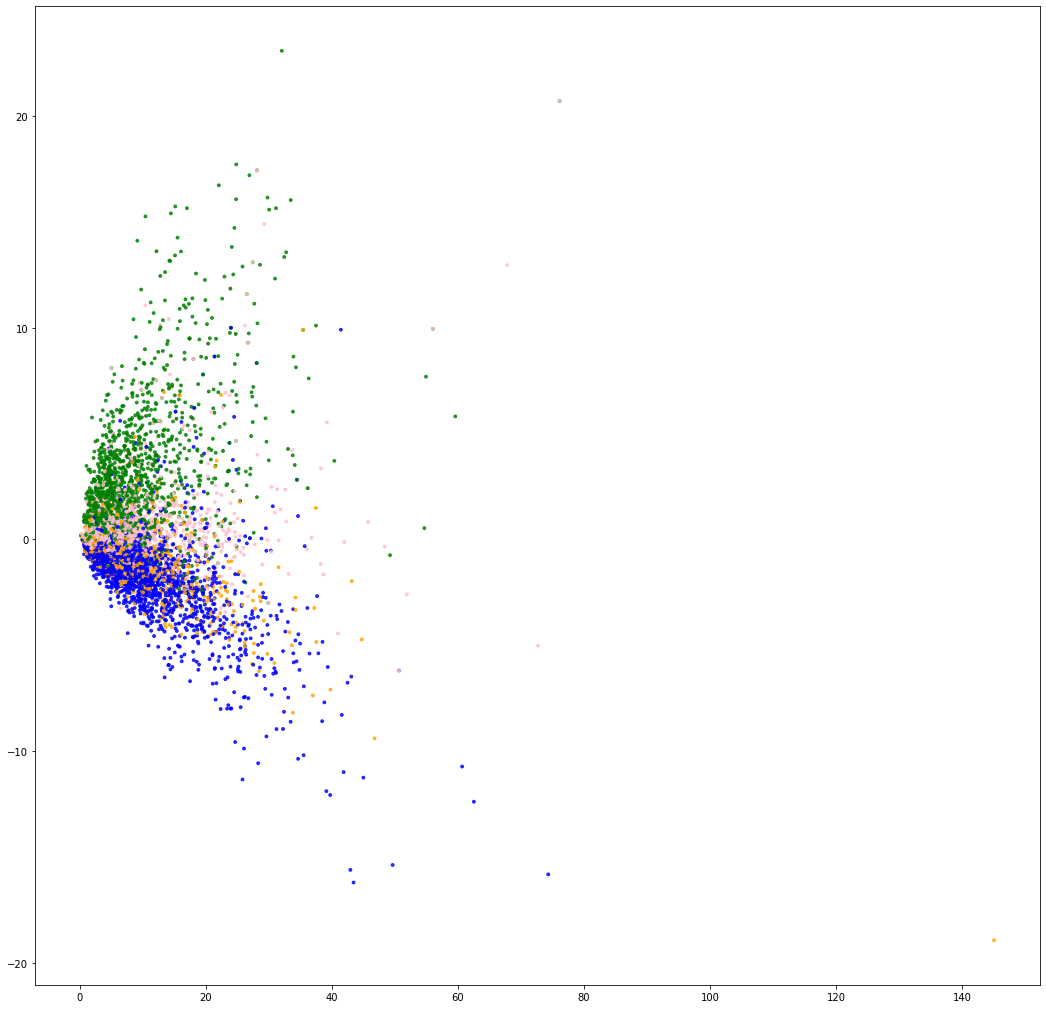

In [365]:
fig = plt.figure(figsize=(18, 18))          
try:    
    plot_LSA(X_train_counts_stemmed, y_train)
except:
    plot_LSA(X_train_counts_stemmed, y_train)
plt.show()

Теперь визуализация выглядит лучше, классы более различимы. 

In [366]:
logreg_stemmed = train_logreg_model(X_train_counts_stemmed, y_train)
y_predicted_counts_stemmed = logreg.predict(X_test_counts_stemmed)

cls done
fit done


accuracy = 0.641, precision = 0.664, recall = 0.641, f1 = 0.638
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


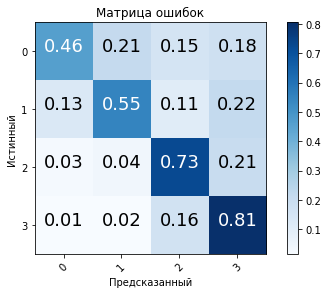

In [367]:
accuracy, precision, recall, f1 = eval_prediction(y_test, y_predicted_counts_stemmed, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Стало хуже! Но при этом намного лучше стало отслеживание вкладов, а ипотеки, наоборот, хуже. Это свзяано с тем, что классификатор всё записывает во вклады (смотрим на матрицу ошибок - 4 столбец самый насыщенный). Этот классификатор нам не подходит - качество ниже, чем у предыдущего.

In [368]:
importance_stemmed = get_most_important_features(count_vectorizer_stemmed, logreg_stemmed, 20) 

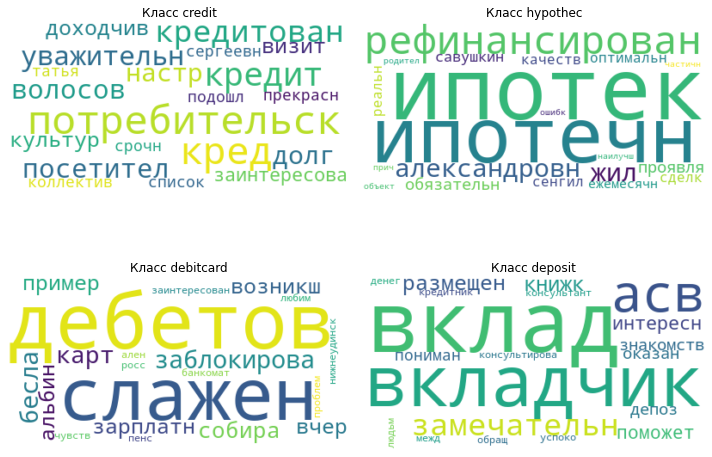

In [369]:
plot_most_important_features(importance_stemmed) # 

Теперь облака слов выглядят получше, хоть всё ещё встречаются повторы. Однако, при этом качество модели не улучшилось, а только ухудшилось.  

Улучшим ситуацию с помощью TF-IDF.

#### TF-IDF мешок слов

In [370]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

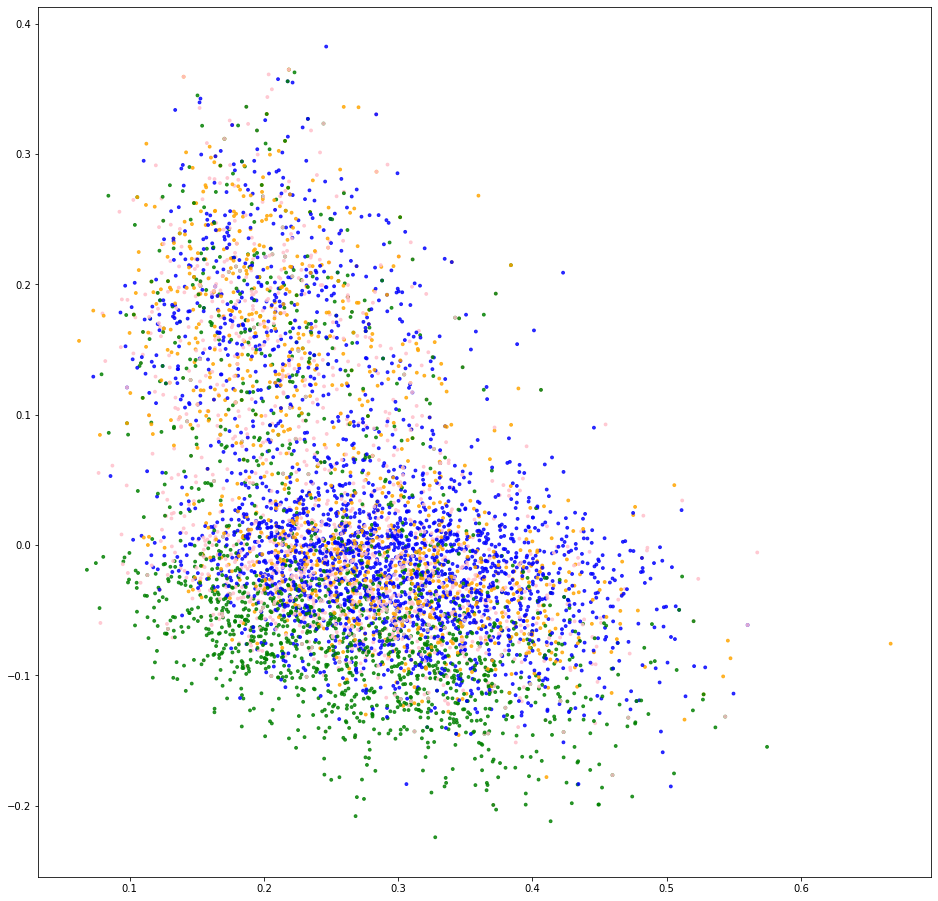

In [371]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

Теперь классы комментариев становсятся более различимыми, и шкала сильно сократилась. Это заслуга взвешенного мешка слов!

In [372]:
logreg_tfidf = train_logreg_model(X_train_tfidf, y_train)
y_predicted_tfidf = logreg_tfidf.predict(X_test_tfidf)

cls done
fit done


accuracy = 0.775, precision = 0.778, recall = 0.775, f1 = 0.776
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


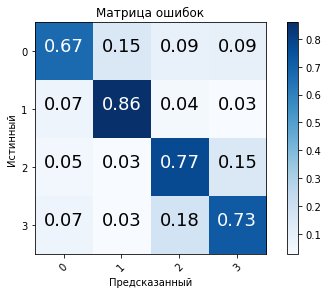

In [373]:
accuracy, precision, recall, f1 = eval_prediction(y_test, y_predicted_tfidf, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Видим заметное улучшение классификатора в деле угадывания кредита (рост почти на 0.10). Это добавляет нашей модели сбалансированность. Также наблюдаем рост метрик до 76-77%. Рост в 2-2.5% - неплохой показатель. 

In [374]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, logreg_tfidf, 20) 

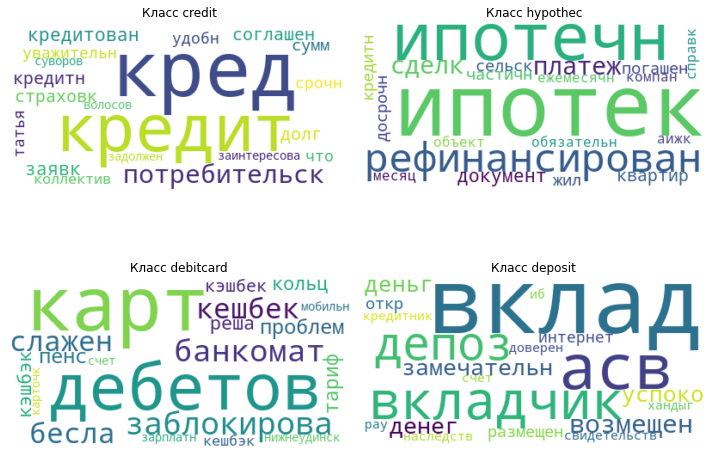

In [375]:
plot_most_important_features(importance_tfidf)

Облако слов отражает улучшение ситуации - роль слов, отражающих название класса, увеличилась. Также стало меньше бессмысленных слов типа названий населенных пунктов и имен. 

Теперь применим tf-idf мешок слов для лемматизированных ранее токенов и посмотрим на результат. 

In [376]:
lemmed_corpus = reviews_clear_df['tokens_nstop_lemm_pos'].map(lambda x: ' '.join(x)).tolist()
list_labels = reviews_clear_df["class_label"].tolist()

X_train_lemmed, X_test_lemmed, y_train_lemmed, y_test_lemmed = train_test_split(lemmed_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

In [377]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf_lemmed, tfidf_vectorizer_lemmed = tfidf(X_train_lemmed)
X_test_tfidf_lemmed = tfidf_vectorizer_lemmed.transform(X_test_lemmed)

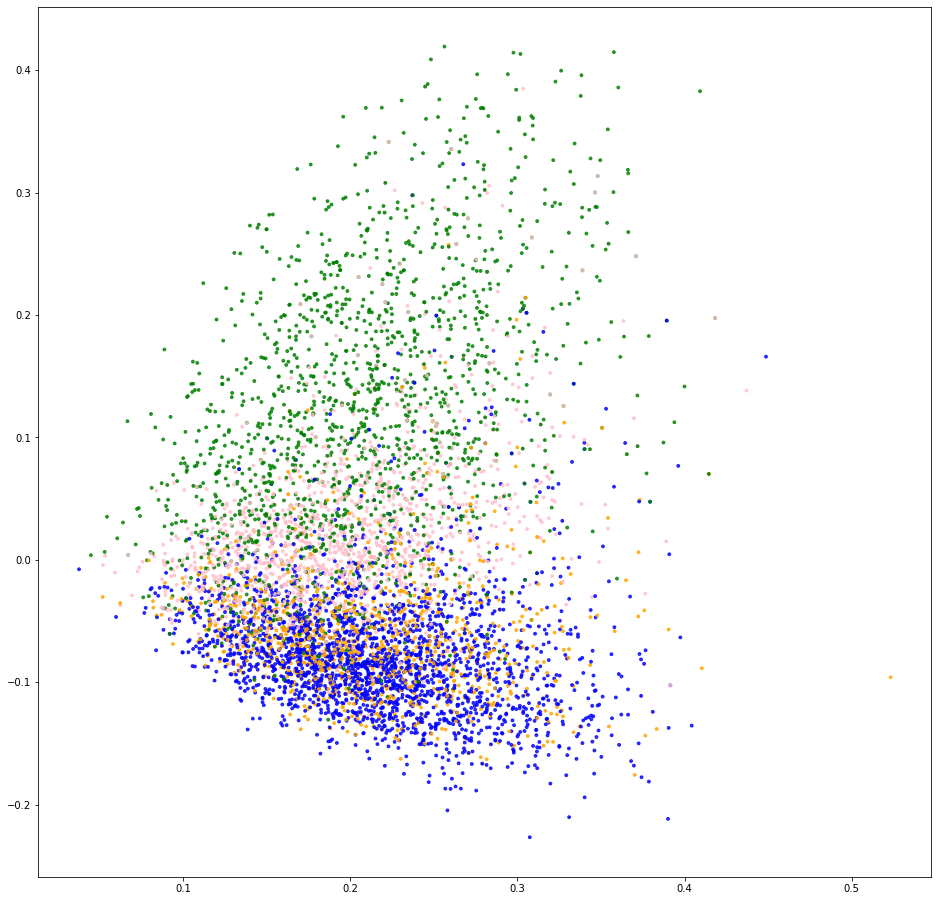

In [378]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf_lemmed, y_train_lemmed)
plt.show()

Классы стали более различимы, это произошло благодаря лемматизации. 

In [379]:
logreg_tfidf_lemmed = train_logreg_model(X_train_tfidf_lemmed, y_train_lemmed)
y_predicted_tfidf_lemmed = logreg_tfidf_lemmed.predict(X_test_tfidf_lemmed)

cls done
fit done


accuracy = 0.783, precision = 0.784, recall = 0.783, f1 = 0.783
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


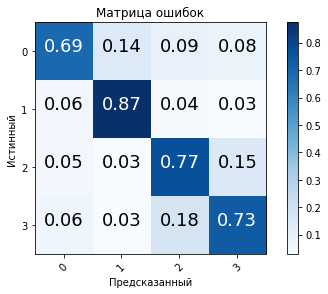

In [380]:
accuracy, precision, recall, f1 = eval_prediction(y_test_lemmed, y_predicted_tfidf_lemmed, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Лемматизированные слова по метрикам эффективнее, чем нелемматизировнные. Получаем 78% по accuracy и recall. Как всегда, классификатор склонен путать 

In [381]:
importance_tfidf_lemmed = get_most_important_features(tfidf_vectorizer_lemmed, logreg_tfidf_lemmed, 20) 

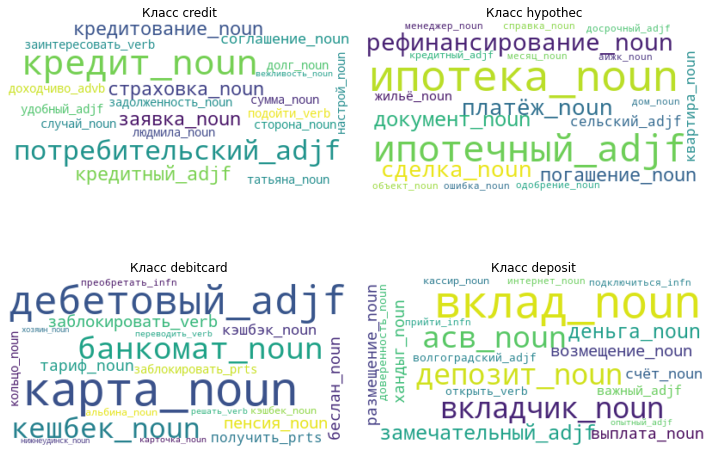

In [382]:
plot_most_important_features(importance_tfidf_lemmed)

Зато облако слов теперь выглядит более выразительно, не встреаются одинаковые слова и указаны части речи. 

### word2vec

#### Модель на имеющихся данных

In [426]:
import gensim
from gensim.models.word2vec import Word2Vec

In [427]:
# обучим модель на токенах
word2vec = Word2Vec(reviews_clear_df['tokens_nstop'], workers=4, size=300)

In [428]:
# функция для нахождения среднего в векторных представлениях слов
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

# функция получения embedding'ов для слолбца DataFrame'а
def get_word2vec_embeddings(vectors, df, field='tokens_nstop', generate_missing=False):
    embeddings = df[field].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)

In [429]:
embeddings = get_word2vec_embeddings(word2vec, reviews_clear_df)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

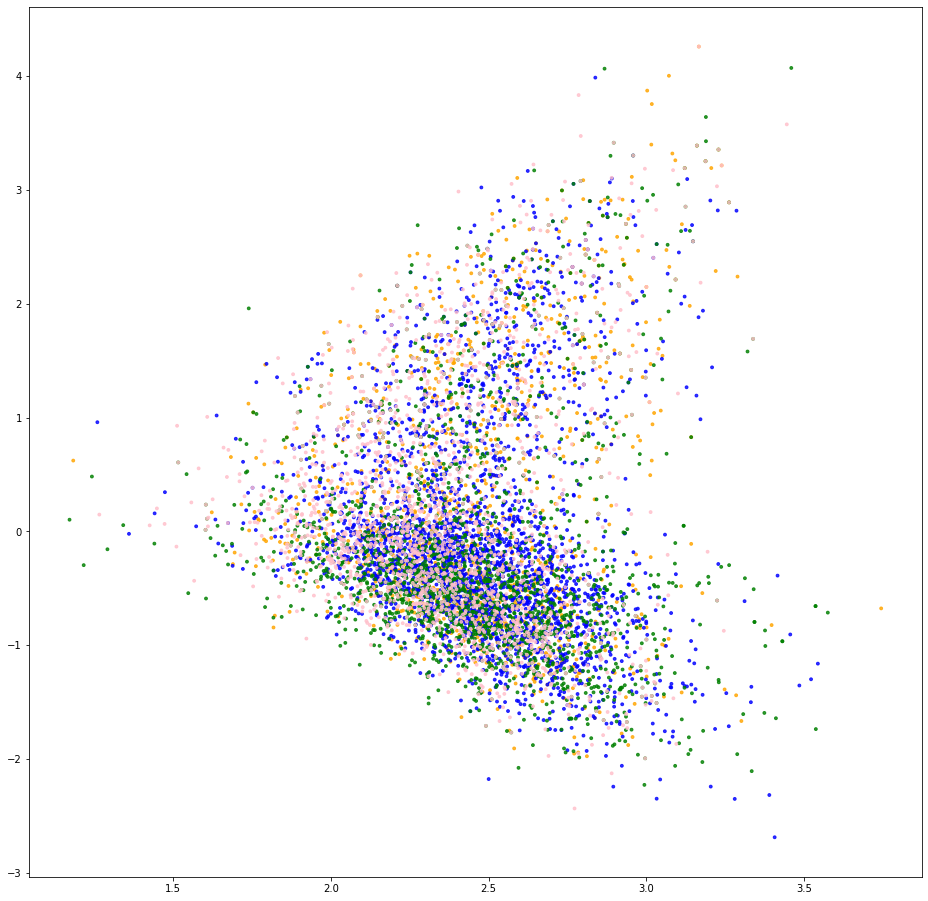

In [430]:
fig = plt.figure(figsize=(16, 16))          
try:
    plot_LSA(embeddings, list_labels)
except:
    plot_LSA(embeddings, list_labels)
plt.show() 

Embedding'и довольно сильно смешаны.

In [431]:
logreg_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
logreg_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = logreg_w2v.predict(X_test_word2vec)

accuracy = 0.736, precision = 0.745, recall = 0.736, f1 = 0.738
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


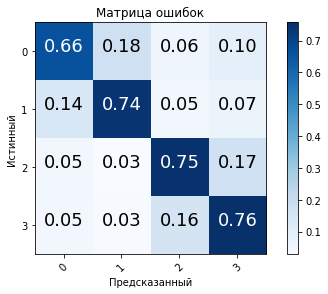

In [432]:
accuracy, precision, recall, f1 = eval_prediction(y_test_word2vec, y_predicted_word2vec, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Обученный нами word2vec не очень впечатляет, можно было бы и получше - метрики ниже, чем у TF-IDF мешка слов. В таком случае, лучше применить внешнюю модель, предобученную на большом количестве данных.

#### Внешняя модель

[Русская реализация word2vec](https://github.com/RaRe-Technologies/gensim-data/issues/3). Используем одну из этих [моделей](https://rusvectores.org/en/models/). Например, <code>word2vec-ruscorpora-300</code>. Затем используем внешнюю модель для создания векторных представлений слов (embeddings). В <code>gensim</code> также есть загрузчик моделей, который и будет использован. 

In [433]:
import gensim
import gensim.downloader as api

In [434]:
%%time
word2vec_outer = api.load("word2vec-ruscorpora-300")

CPU times: user 7.17 s, sys: 207 ms, total: 7.38 s
Wall time: 7.39 s


In [435]:
len(word2vec_outer.vocab)

184973

In [436]:

from itertools import islice
list(islice(word2vec_outer.vocab, 100, 120))

['великий_ADJ',
 'уходить_VERB',
 'деньги_NOUN',
 'второй_ADJ',
 'мысль_NOUN',
 'приходиться_VERB',
 'работать_VERB',
 'именно_PART',
 'оно_PRON',
 'дорога_NOUN',
 'рассказывать_VERB',
 'увидеть_VERB',
 'дверь_NOUN',
 'вместе_ADV',
 'представлять_VERB',
 'просто_PART',
 'война_NOUN',
 'находиться_VERB',
 'происходить_VERB',
 'книга_NOUN']

Модель, скачанная извне, будет работать только с токенами, к которым прикреплена строка с информацией о части речи. 

In [437]:
word2vec_outer.most_similar('консул_NOUN')[0]

('консульство_NOUN', 0.7268803119659424)

Возьмем токены, очищенные от стоп-слов, к которым применили лемматизацию.  

In [438]:
embeddings = get_word2vec_embeddings(word2vec_outer, reviews_clear_df, field='tokens_nstop_lemm_pos')
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

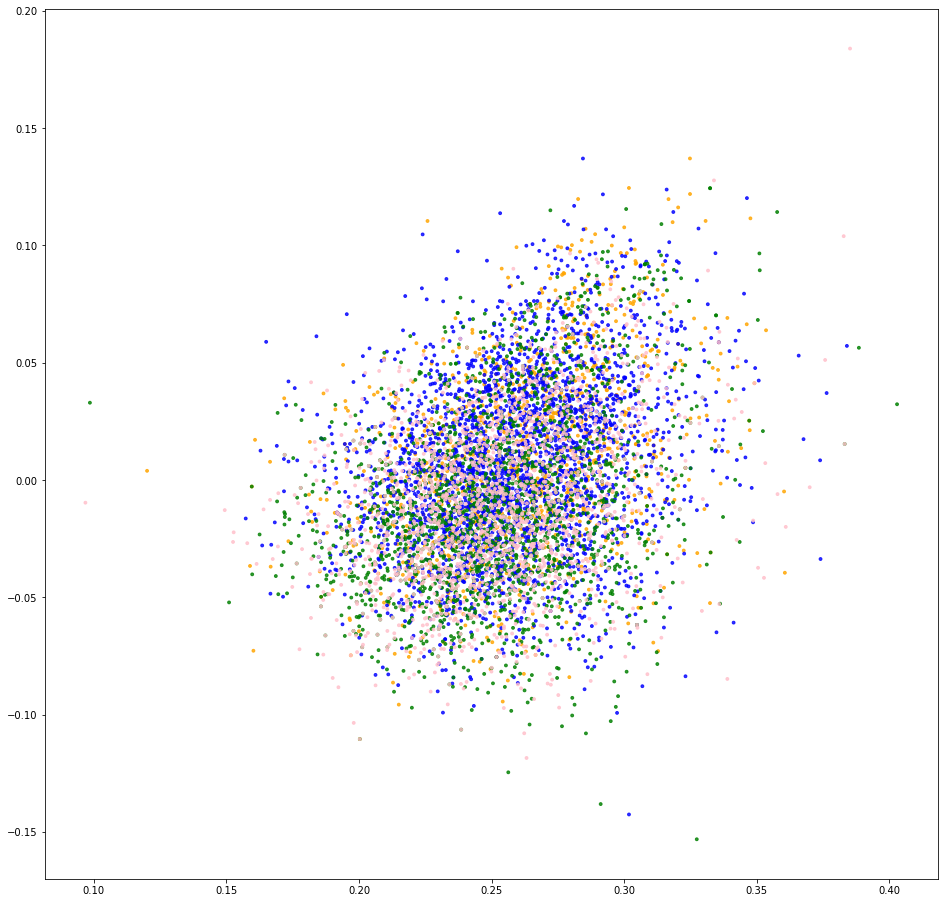

In [439]:
fig = plt.figure(figsize=(16, 16))          
try:
    plot_LSA(embeddings, list_labels)
except:
    plot_LSA(embeddings, list_labels)
plt.show() 

Embedding'и также довольно сильно смешаны.

In [440]:
logreg_w2v_outer = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
logreg_w2v_outer.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = logreg_w2v_outer.predict(X_test_word2vec)

accuracy = 0.791, precision = 0.799, recall = 0.791, f1 = 0.793
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


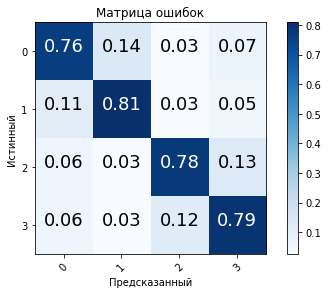

In [441]:
accuracy, precision, recall, f1 = eval_prediction(y_test_word2vec, y_predicted_word2vec, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

word2vec с помощью embedding'ов пока что самый эффективный, ~79% по всем метрикам. И матрица ошибок выглядит довольно прилично, лучше, чем в прошлых случаях. В ней чаще всего путаются кредит и ипотека, а также дебетовая карта и вклад, но сутация в целом лучше, чем раньше.  

##Применение нейросети

Сначала надо провести подготовку данных для включения word2vec embedding'ов в нейросеть, определить, сколько слов из отзыва  будет использоваться в работе нейросети, а также размерность входных данных. 

In [399]:
all_words, reviews_lengths, vocab = analyze_df_tokens(reviews_clear_df, 'tokens_nstop_lemm_pos')

832650 всего слов, со словарем размером 24278
Максимальная длина отзыва: 1498


In [400]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


VOCAB_SIZE = len(vocab)
VALIDATION_SPLIT=.2

# токенизируем данные по 
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(reviews_clear_df['tokens_nstop_lemm_pos'].tolist())
sequences = tokenizer.texts_to_sequences(reviews_clear_df['tokens_nstop_lemm_pos'].tolist())

EMBEDDING_DIM = 300 # длина векторного представления word2vec
MAX_SEQUENCE_LENGTH = 175 # np.max([len(i) for i in sequences]) // 4

word_index = tokenizer.word_index
print(f'Найдено {len(word_index)} уникальных токенов.')

# определяем тренировочную и тестовые выборки
cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(reviews_clear_df["class_label"]))
indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

# формируем embedding'и для использования в нейросети
embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = \
    word2vec_outer[word] if word in word2vec_outer else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Найдено 24278 уникальных токенов.
(24279, 300)


In [401]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

### CNN

In [417]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model


def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False):
    
    # слой с embedding'ами - в него положим данные от внешней word2vec
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # модель Юна-Кима (https://arxiv.org/abs/1408.5882)
    convs = []
    # размеры фильтров
    filter_sizes = [2,3,4]

    # создадим слои для свертывания
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    # объединим созданные ранее слои
    concatenate = Concatenate(axis=1)(convs)


    x = Dropout(0.5)(concatenate)  
    
    x = Flatten()(x)
    # добавим немного слоев с разным кол-вом нейронов
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
  
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [418]:
model_cnn = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(reviews_clear_df["class_label"].unique())))

In [419]:
model_cnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128)

Epoch 1/20
51/51 [==============================] - 2s 30ms/step - loss: 1.4689 - acc: 0.3512 - val_loss: 1.3034 - val_acc: 0.3854
Epoch 2/20
51/51 [==============================] - 1s 25ms/step - loss: 1.2393 - acc: 0.4595 - val_loss: 1.1459 - val_acc: 0.5298
Epoch 3/20
51/51 [==============================] - 1s 26ms/step - loss: 1.1460 - acc: 0.5098 - val_loss: 1.0717 - val_acc: 0.5360
Epoch 4/20
51/51 [==============================] - 1s 25ms/step - loss: 1.0454 - acc: 0.5575 - val_loss: 0.9017 - val_acc: 0.6460
Epoch 5/20
51/51 [==============================] - 1s 25ms/step - loss: 0.9428 - acc: 0.6024 - val_loss: 0.8446 - val_acc: 0.6736
Epoch 6/20
51/51 [==============================] - 1s 26ms/step - loss: 0.9007 - acc: 0.6336 - val_loss: 0.8244 - val_acc: 0.6724
Epoch 7/20
51/51 [==============================] - 1s 25ms/step - loss: 0.8656 - acc: 0.6471 - val_loss: 0.7897 - val_acc: 0.6939
Epoch 8/20
51/51 [==============================] - 1s 25ms/step - loss: 0.8426 - a

In [420]:
# подгоним рещультат под функцию оценки предсказания
y_pred = model_cnn.predict(x_val)
y_pred_int = [np.array([int(i > 0.5) for i in lst]) for lst in y_pred]
y_pred_class = list(map(lambda x: x.argmax(), y_pred_int))
y_val_class = list(map(lambda x: x.argmax(), y_val))

accuracy = 0.713, precision = 0.761, recall = 0.713, f1 = 0.720
{'credit': 0, 'hypothec': 1, 'debitcard': 2, 'deposit': 3}


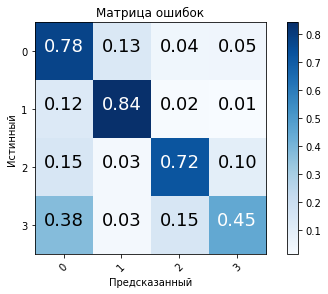

In [421]:
accuracy, precision, recall, f1 = eval_prediction(y_val_class, y_pred_class, True)
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}")
print(label_encoding)

Метрики держатся на низком (по сравнению с другими метолами) уровне. По матрице ошибок видно, что модель очень плохо предсказывает отзывы о вкладах. Также слишком многое записывает в кредиты. 

Нейросеть показывает неплохой результат, но логистическую регрессию ей превзойти не удалось. Остановимся на логистической регрессии, обученной на внешней модели word2vec. Она показала лучший результат.  